In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data without review; parse date
dat = pd.read_csv('../dat/yelp_academic_dataset_review_nr.csv', parse_dates=['date'])

In [3]:
print list(dat)

['funny', 'user_id', 'review_id', 'business_id', 'stars', 'date', 'useful', 'type', 'cool']


number of items: 144072
maximum item count: 4JNXUYY8wbaaDmk3BPzlWw 6414
number of items ( >= 10 reviews ): 67437


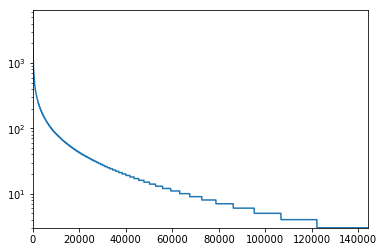

In [4]:
# preprocess item counts
item_count = dat.business_id.value_counts()
print 'number of items: %d' % len(item_count)

# find out item with maximum item count
item_count_max = item_count.max()
item_count_argmax = item_count.argmax()
print 'maximum item count: %s %d' % (item_count_argmax, item_count_max)

# filter out item with less than 10 reviews
print 'number of items ( >= 10 reviews ): %d' % item_count[item_count >= 10].shape[0]

# plot item counts (logy)
item_count.plot(use_index=False, logy=True, ylim=(0, item_count_max))
#item_count.plot(figsize=(18, 16), use_index=False, logy=True, ylim=(0, item_count_max))

number of users: 1029432
maximum user count: CxDOIDnH8gp9KXzpBHJYXw 3327
number of users ( >= 3 reviews ): 320482


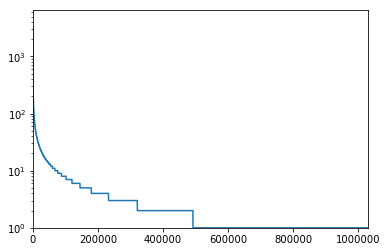

In [5]:
# preprocess user counts
user_count = dat.user_id.value_counts()
print 'number of users: %d' % len(user_count)

# find out item with maximum item count
user_count_max = user_count.max()
user_count_argmax = user_count.argmax()
print 'maximum user count: %s %d' % (user_count_argmax, user_count_max)

# filter out item with less than 10 reviews
print 'number of users ( >= 3 reviews ): %d' % user_count[user_count >= 3].shape[0]

# plot item counts (logy)
user_count.plot(use_index=False, logy=True, ylim=(0, item_count_max))
#user_count.plot(figsize=(18, 16), use_index=False, logy=True, ylim=(0, user_count_max))

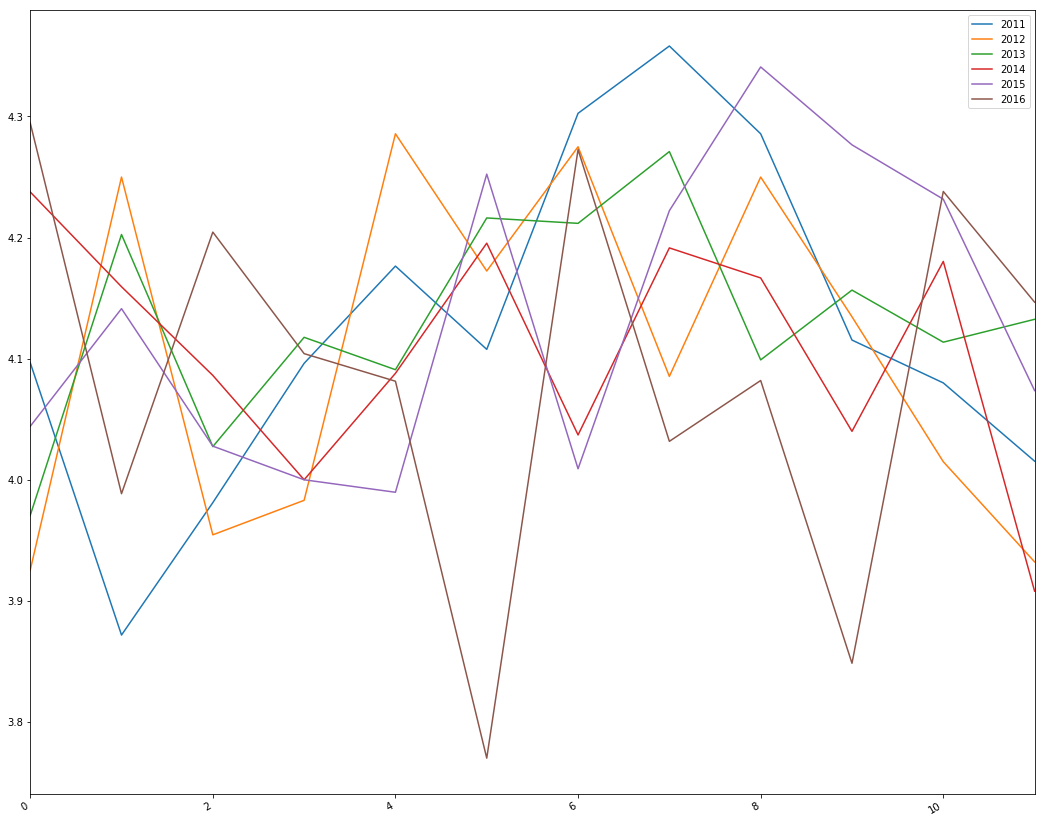

In [6]:
sdat = dat[dat.business_id == '4JNXUYY8wbaaDmk3BPzlWw']
timeLst = [2011, 2012, 2013, 2014, 2015, 2016]
for time in timeLst:
    sdat_m = pd.DataFrame([row[1] for row in sdat.iterrows() if row[1][5].year == time])
    sdat_m = sdat_m.set_index('date').groupby(pd.TimeGrouper('M'))['stars'].mean().fillna(0)
    sdat_m.name = str(time)
    sdat_m.plot(y='date', use_index=False, figsize=(18, 16), legend=True)

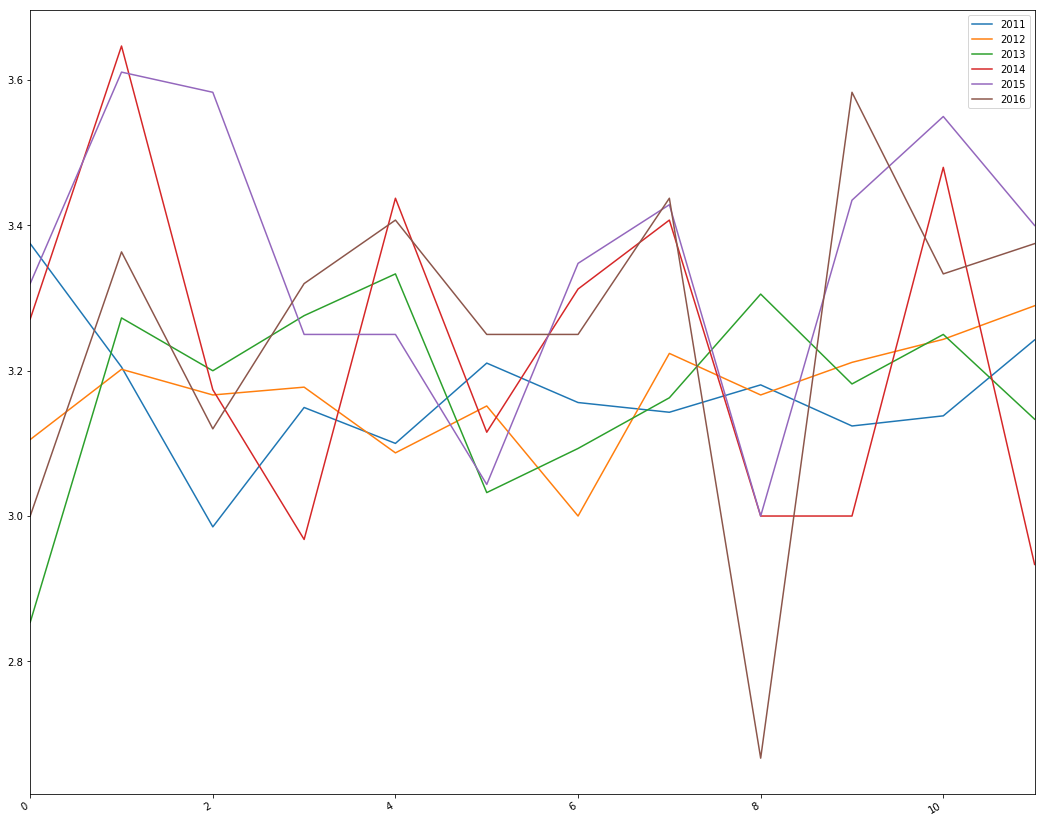

In [7]:
sdat = dat[dat.user_id == 'CxDOIDnH8gp9KXzpBHJYXw']
timeLst = [2011, 2012, 2013, 2014, 2015, 2016]
for time in timeLst:
    sdat_m = pd.DataFrame([row[1] for row in sdat.iterrows() if row[1][5].year == time])
    sdat_m = sdat_m.set_index('date').groupby(pd.TimeGrouper('M'))['stars'].mean().fillna(0)
    sdat_m.name = str(time)
    sdat_m.plot(y='date', use_index=False, figsize=(18, 16), legend=True)